# Problem Statement
#### Classify the Size_Category of Forest Fire using SVM

    month	month of the year: 'jan' to 'dec'
    day	day of the week: 'mon' to 'sun'
    FFMC	FFMC index from the FWI system: 18.7 to 96.20
    DMC	DMC index from the FWI system: 1.1 to 291.3
    DC	DC index from the FWI system: 7.9 to 860.6
    ISI	ISI index from the FWI system: 0.0 to 56.10
    temp	temperature in Celsius degrees: 2.2 to 33.30
    RH	relative humidity in %: 15.0 to 100
    wind	wind speed in km/h: 0.40 to 9.40
    rain	outside rain in mm/m2 : 0.0 to 6.4
    Size_Categorie 	the burned area of the forest ( Small , Large)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay, roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV

In [3]:
raw_data = pd.read_csv('forestfires.csv')
raw_data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


# Data Cleaning

In [4]:
data = raw_data.copy()
data.drop(['month','day'], axis = 1, inplace = True)
data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


#### Labeling the Target Variable with size_category as (large :1, small :0)

In [5]:
data['size_category'] = np.where(data['size_category'].str.contains("large"), 1, 0)
data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0


# Exploratory Data Analysis

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [7]:
data.describe(include='all')

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689,0.268859
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632,0.443796
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data.isna().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

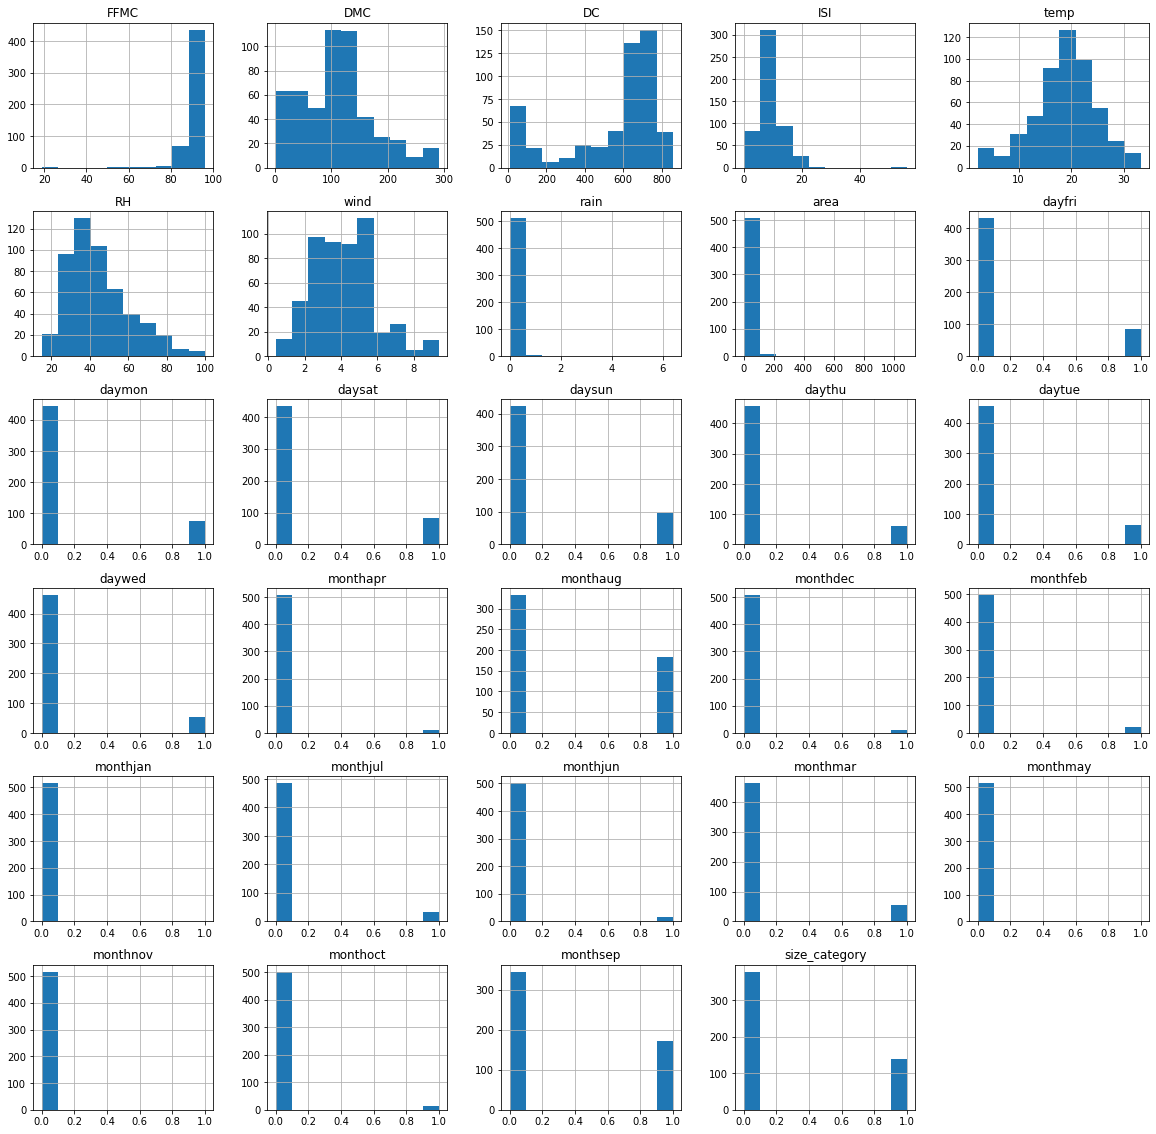

In [12]:
data.hist(figsize=(20,20))
plt.show()

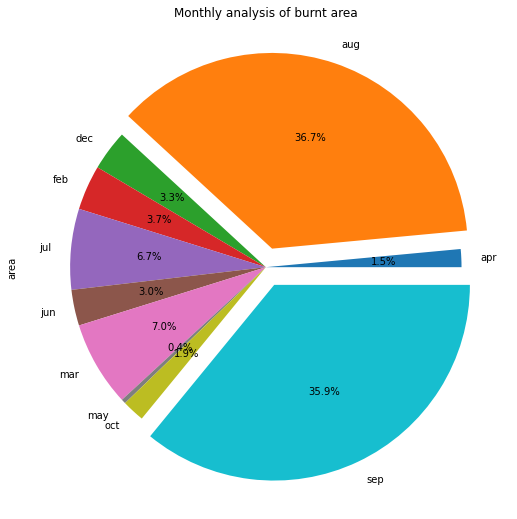

In [19]:
areaburnt=raw_data[raw_data['area']>0]
areaburnt.groupby('month')['area'].agg('count').plot(kind='pie',title='Monthly analysis of burnt area',figsize=(9,9),explode=[0,0.1,0,0,0,0,0,0,0,0.1],autopct='%0.1f%%')
plt.show()

Text(0.5, 1.0, 'Foeest Fire Size Category')

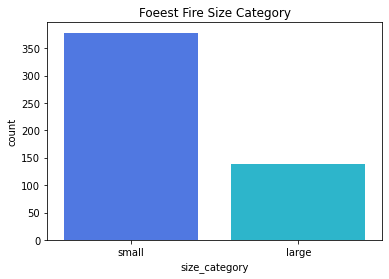

In [20]:
pal = sns.color_palette('rainbow')
sns.countplot(x='size_category', data=raw_data, palette = pal, 
              order=raw_data['size_category'].value_counts().index)
plt.xticks()
plt.title('Foeest Fire Size Category')

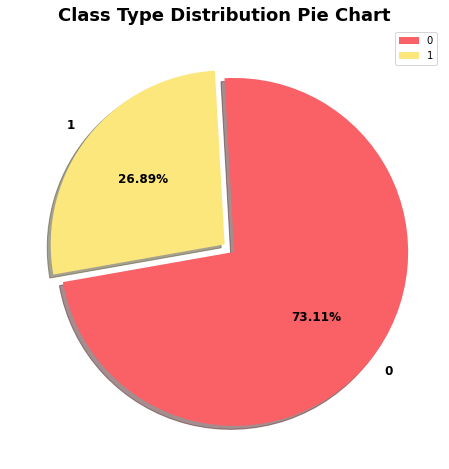

In [21]:
plt.figure(figsize = (12,8))
plt.pie(data['size_category'].value_counts(),
       labels=data.size_category.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
        colors = ["#F96167", "#FCE77D"],
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

# Train Test Split

In [22]:
x = data.drop('size_category',axis=1)
y = data['size_category']

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 45, stratify = y)

In [24]:
print('Training Data', Counter(y_train), 'Testing Data', Counter(y_test))

Training Data Counter({0: 264, 1: 97}) Testing Data Counter({0: 114, 1: 42})


In [25]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (361, 28)
Shape of X_test:  (156, 28)
Shape of y_train:  (361,)
Shape of y_test (156,)


# Model Bulding using default Hyper Parametetrs on Imbalanced Data

In [26]:
clf = SVC()

In [27]:
clf.fit(x_train, y_train)

SVC()

In [28]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [29]:
print_score(clf, x_train, y_train, x_test, y_test, train=True)
print_score(clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 74.52%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.741573   1.000000  0.745152    0.870787      0.811012
recall       1.000000   0.051546  0.745152    0.525773      0.745152
f1-score     0.851613   0.098039  0.745152    0.474826      0.649129
support    264.000000  97.000000  0.745152  361.000000    361.000000
_______________________________________________
Confusion Matrix: 
 [[264   0]
 [ 92   5]]

Test Result:
Accuracy Score: 76.92%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.760000   1.000000  0.769231    0.880000      0.824615
recall       1.000000   0.142857  0.769231    0.571429      0.769231
f1-score     0.863636   0.250000  0.769231    0.556818      0.698427
support    114.000000  42.000000  0.769231  156.000000    156.000000
___

###### **As the data is imbalanced, our model prediction is biased

# Handling imbalance data using SMOTE based techniques

### 1. SMOTE Oversampling technique

In [30]:
from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN

counter = Counter(y_train)
print('Before',counter)
smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 264, 1: 97})
After Counter({0: 264, 1: 264})


### 2. ADASYN: Adaptive Synthetic Sampling Approach

In [31]:
counter = Counter(y_train)
print('Before',counter)
ada = ADASYN(random_state=130)
x_train_ada, y_train_ada = ada.fit_resample(x_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({0: 264, 1: 97})
After Counter({0: 264, 1: 256})


### 3. Hybridization: SMOTE + Tomek Links

In [32]:
counter = Counter(y_train)
print('Before',counter)
smtom = SMOTETomek(random_state=139)
x_train_smtom, y_train_smtom = smtom.fit_resample(x_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({0: 264, 1: 97})
After Counter({0: 260, 1: 260})


### 4. Hybridization: SMOTE + ENN

In [33]:
counter = Counter(y_train)
print('Before',counter)
smenn = SMOTEENN()
x_train_smenn, y_train_smenn = smenn.fit_resample(x_train, y_train)

counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({0: 264, 1: 97})
After Counter({1: 174, 0: 153})


### 5. Performance Analysis after Resampling

In [34]:
sampled_data = {
    'ACTUAL':[x_train, y_train],
    'SMOTE':[x_train_sm, y_train_sm],
    'ADASYN':[x_train_ada, y_train_ada],
    'SMOTE_TOMEK':[x_train_smtom, y_train_smtom],
    'SMOTE_ENN':[x_train_smenn, y_train_smenn]
}

In [35]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)
    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))
    f1 = f1_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    precision = precision_score(y_test, y_pred, average='binary')
    return algo,precision,recall,f1,sampling

In [36]:
model_params = {'SVC' : {'model' : SVC(probability=True),
                         'params' :[{'C':[1, 10, 100, 1000], 'kernel':['linear']},
                                    {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.01, 0.001,0.0001]},
                                    {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.1, 0.01, 0.001,0.0001]} 
                                   ]
                        }
                }

In [37]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)
output = []
for model , model_hp in model_params.items():
    for resam , data in sampled_data.items():
        clf = RandomizedSearchCV(model_hp['model'], model_hp['params'],cv = cv, scoring='f1_weighted', n_jobs=-1 )
        clf.fit(data[0], data[1])
        clf_best = clf.best_estimator_
        print('x'*60)
        print(model+' with ' + resam)
        print('='*60)
        output.append(test_eval(clf_best, x_test, y_test, model, resam))

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
SVC with ACTUAL
Confusion Matrix
[[113   1]
 [  0  42]] 

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       114
           1       0.98      1.00      0.99        42

    accuracy                           0.99       156
   macro avg       0.99      1.00      0.99       156
weighted avg       0.99      0.99      0.99       156
 

AUC-ROC
1.0
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
SVC with SMOTE
Confusion Matrix
[[112   2]
 [  1  41]] 

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       114
           1       0.95      0.98      0.96        42

    accuracy                           0.98       156
   macro avg       0.97      0.98      0.98       156
weighted avg       0.98      0.98      0.98       156
 

AUC-ROC
0.9993734335839598
xxxxxxxxxxxxxxxxxxxxxx

###### **SVC with ADASYN is giving good results, so we use it.

# Classification Model With Linear Kernal 

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x_train_ada,y_train_ada,test_size=0.3,random_state=1, stratify=y_train_ada)

In [39]:
print('Training Data', Counter(y_train), 'Testing Data', Counter(y_test))

Training Data Counter({0: 185, 1: 179}) Testing Data Counter({0: 79, 1: 77})


In [40]:
lin_model = SVC(kernel='linear', probability=True)
lin_model.fit(x_train, y_train)

SVC(kernel='linear', probability=True)

In [41]:
y_pred = lin_model.predict(x_test)
print('SVM Linear Kernel Model','\n',classification_report(y_test, y_pred))

SVM Linear Kernel Model 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        79
           1       0.97      0.99      0.98        77

    accuracy                           0.98       156
   macro avg       0.98      0.98      0.98       156
weighted avg       0.98      0.98      0.98       156



In [42]:
print('Training set score: {:.2f}%'.format(lin_model.score(x_train, y_train)*100))
print('Test set score: {:.2f}%'.format(lin_model.score(x_test, y_test)*100))

Training set score: 100.00%
Test set score: 98.08%


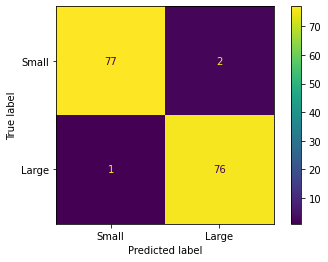

In [43]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=["Small", "Large"]).plot()
plt.show()

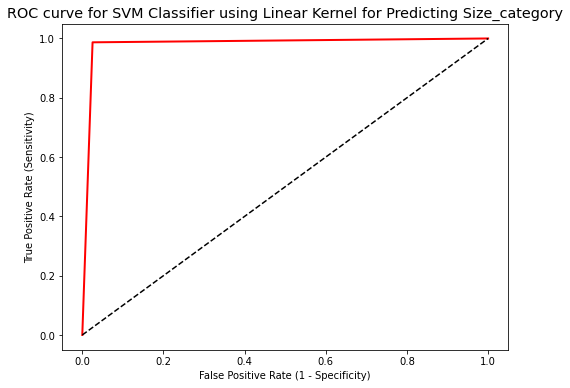

ROC AUC : 0.9808


In [44]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2, color='red')
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM Classifier using Linear Kernel for Predicting Size_category')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

ROC_AUC = roc_auc_score(y_test, y_pred)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

# Classification Model With Polynomial Kernal 

In [45]:
poly_model = SVC(kernel='poly', probability=True)
poly_model.fit(x_train, y_train)

SVC(kernel='poly', probability=True)

In [46]:
y_pred_poly = poly_model.predict(x_test)
print('SVM Polynomial Kernel Model','\n',classification_report(y_test, y_pred_poly))

SVM Polynomial Kernel Model 
               precision    recall  f1-score   support

           0       0.62      0.99      0.76        79
           1       0.97      0.38      0.54        77

    accuracy                           0.69       156
   macro avg       0.79      0.68      0.65       156
weighted avg       0.79      0.69      0.65       156



In [47]:
print('Training set score: {:.2f}%'.format(poly_model.score(x_train, y_train)*100))
print('Test set score: {:.2f}%'.format(poly_model.score(x_test, y_test)*100))

Training set score: 71.15%
Test set score: 68.59%


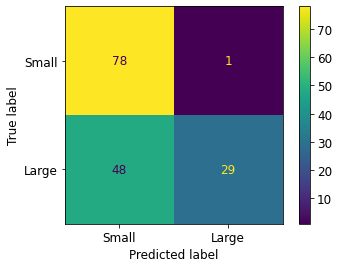

In [48]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_poly), display_labels=["Small", "Large"]).plot()
plt.show()

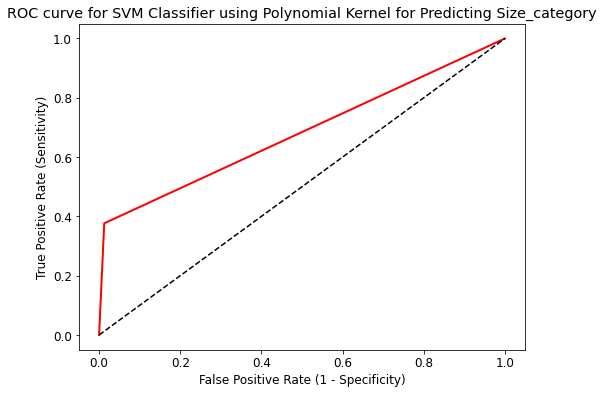

ROC AUC : 0.6820


In [49]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_poly)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2, color='red')
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM Classifier using Polynomial Kernel for Predicting Size_category')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

ROC_AUC = roc_auc_score(y_test, y_pred_poly)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

# Classification Model With RBF Kernal 

In [50]:
rbf_model = SVC(kernel='rbf', probability=True)
rbf_model.fit(x_train, y_train)

SVC(probability=True)

In [51]:
y_pred_rbf = rbf_model.predict(x_test)
print('SVM RBF Kernel Model','\n',classification_report(y_test, y_pred_rbf))

SVM RBF Kernel Model 
               precision    recall  f1-score   support

           0       0.60      0.66      0.63        79
           1       0.61      0.55      0.58        77

    accuracy                           0.60       156
   macro avg       0.60      0.60      0.60       156
weighted avg       0.60      0.60      0.60       156



In [52]:
print('Training set score: {:.2f}%'.format(rbf_model.score(x_train, y_train)*100))
print('Test set score: {:.2f}%'.format(rbf_model.score(x_test, y_test)*100))

Training set score: 62.91%
Test set score: 60.26%


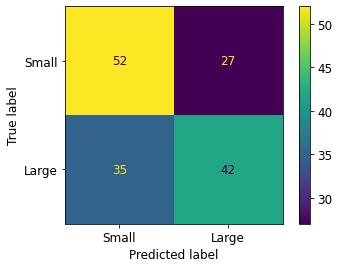

In [53]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rbf), display_labels=["Small", "Large"]).plot()
plt.show()

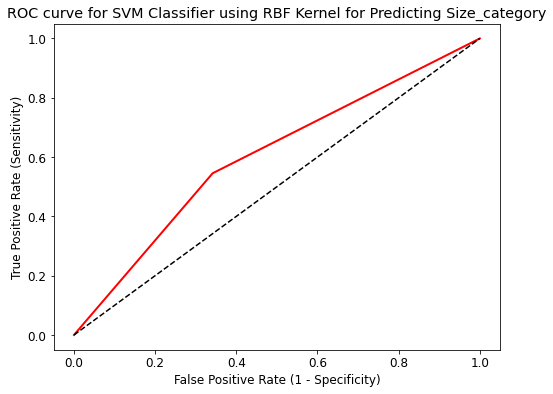

ROC AUC : 0.6018


In [54]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rbf)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2, color='red')
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM Classifier using RBF Kernel for Predicting Size_category')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

ROC_AUC = roc_auc_score(y_test, y_pred_rbf)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

# Classification Model With Sigmoid Kernal 

In [55]:
sig_model = SVC(kernel='sigmoid', probability=True)
sig_model.fit(x_train, y_train)

SVC(kernel='sigmoid', probability=True)

In [56]:
y_pred_sig = sig_model.predict(x_test)
print('SVM Sigmoid Kernel Model','\n',classification_report(y_test, y_pred_sig))

SVM Sigmoid Kernel Model 
               precision    recall  f1-score   support

           0       0.59      0.51      0.54        79
           1       0.56      0.64      0.59        77

    accuracy                           0.57       156
   macro avg       0.57      0.57      0.57       156
weighted avg       0.57      0.57      0.57       156



In [57]:
print('Training set score: {:.2f}%'.format(sig_model.score(x_train, y_train)*100))
print('Test set score: {:.2f}%'.format(sig_model.score(x_test, y_test)*100))

Training set score: 54.95%
Test set score: 57.05%


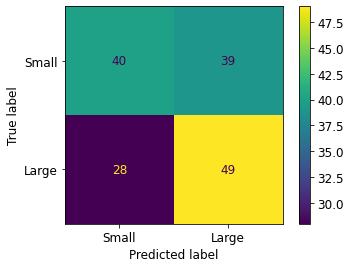

In [58]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_sig), display_labels=["Small", "Large"]).plot()
plt.show()

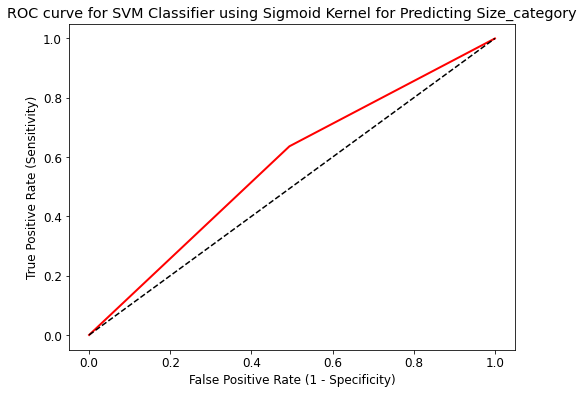

ROC AUC : 0.5713


In [59]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_sig)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, linewidth=2, color='red')
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM Classifier using Sigmoid Kernel for Predicting Size_category')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

ROC_AUC = roc_auc_score(y_test, y_pred_sig)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

## Hyperparameter Tuning with GridSearchCV

### Choose the best kernel and optimal C parameter based on Cross Validation of the training data

In [60]:
tuned_parameters = [{'C':[1, 10, 100, 1000], 'kernel':['linear']},
                    {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.01, 0.001,0.0001]},
                    {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.1, 0.01, 0.001,0.0001]} 
                   ]

In [61]:
scores = ["precision", "recall"]

In [62]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, scoring="%s_macro" % score, n_jobs=-1)
    clf.fit(x_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(x_test)
    print(classification_report(y_true, y_pred, target_names = ["Small", "Large"]))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}

Grid scores on development set:

0.982 (+/-0.038) for {'C': 1, 'kernel': 'linear'}
0.982 (+/-0.038) for {'C': 10, 'kernel': 'linear'}
0.982 (+/-0.038) for {'C': 100, 'kernel': 'linear'}
0.982 (+/-0.038) for {'C': 1000, 'kernel': 'linear'}
0.807 (+/-0.017) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.847 (+/-0.078) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.838 (+/-0.084) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.806 (+/-0.112) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.811 (+/-0.016) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.853 (+/-0.083) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.912 (+/-0.073) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.941 (+/-0.071) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.811 (+/-0.016) for {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.853 (+/-0.083) for {'C': 100, 'gamma': 0.01, 'ker